## 하이퍼파라미터를 이용한 성능 최적화

하이퍼파라미터를 이용한 성능 최적화의 추가적인 방법으로 `배치 정규화`, `드롭아웃`, `조기 종료`가 있습니다.

먼저 배치 정규화부터 살펴보겠습니다.

### 배치 정규화를 이용한 성능 최적화
배치 정규화를 진행하기에 앞서 유사한 의미로 사용되는 용어들을 알아보겠습니다.

### 정규화

정규화(normalization)는 데이터 범위를 `사용자가 원하는 범위로 제한`하는 것을 의미합니다. 예를 들어 이미지 데이터는 픽셀 정보로 0~255 사이의 값을 갖는데, 이를 255로 나누면 0~1.0 사이의 값을 갖게 됩니다.

![](../Static/462.jpg)

정규화는 각 특성 범위(scale)를 조정한다는 의미로 `특성 스케일링(feature scaling)`이라고도 합니다. 스케일 조정을 위해 `MinMaxScaler()` 기법을 사용하므로 수식은 다음과 같습니다.

![](../Static/fn2-3.jpg)

### 규제화

규제화(regulatization)는 `모델 복잡도를 줄이기 위해 제약`을 두는 방법입니다. 이때 제약은 데이터가 네트워크에 들어가기 전에 `필터를 적용한 것`이라고 생각하면 됩니다. 예를 들어 다음 왼쪽 그림은 필터가 적용되지 않을 경우 모든 데이터가 네트워크에 투입되지만, 오른쪽 그림은 필터로 걸러진 데이터만 네트워크에 투입되어 빠르고 정확한 결과를 얻을 수 있습니다.

![](../Static/463_1.jpg)

규제를 이용하여 모델 복잡도를 줄이는 방법은 다음과 같습니다.

* 드롭아웃
* 조기 종료

### 표준화
표준화(standardization)는 기존 데이터를 평균은 0, 표준편차는 1인 형태의 데이터로 만드는 방법입니다. 다른 표현으로 표준화 스칼라(standard scaler) 혹은 z-스코어 정규화(z-score normalization)라고도 합니다.

![](../Static/463_2.jpg)

평균을 기준으로 얼마나 떨어져 있는지 살펴볼 때 사용합니다. 보통 데이터 분포가 가우시안 분포를 따를 때 유용한 방법으로 다음 수식을 사용합니다.

![](../Static/fn2-4.jpg)

### 배치 정규화

배치 정규화(batch normalization)은 데이터 분포가 안정되어 학습 속도를 높일 수 있습니다.

배치 정규화는 기울기 소멸(gradient vanishing)이나 기울기 폭발(gradient exploding) 같은 문제를 해결하기 위한 방법입니다. 일반적으로 기울기 소멸이나 폭발 문제를 해결하기 위해 손실 함수로 `렐루(ReLU)` 를 사용하거나 초깃값 튜닝, `학습률(learning rate)`등을 조정합니다.

* 기울기 소멸 : 오차 정보를 역전파시키는 과정에서 기울기가 급격히 0에 가까워져 학습이 되지 않는 현상입니다.

* 기울기 폭발 : 학습 과정에서 기울기가 급격히 커지는 현상입니다.

![](../Static/465_1.jpg)

배치 정규화가 소개된 논문에 따르면 기울기 소멸과 폭발 원인은 내부 공변량 변화(internal covariance shift)때문인데, 이것은 네트워크의 각 층마다 활성화 함수가 적용되면서 입력 값들의 분포가 계속 바뀌는 현상을 의미합니다. 따라서 분산된 분포를 정규분포로 만들기 위해 표준화와 유사한 방식을 `미니 배치(mini-batch)`에 적용하여 평균은 0으로, 표준편차는 1로 유지하도록 하며 수식은 다음과 같습니다.

![](../Static/465_2.jpg)

1. 미니 배치의 평균을 구합니다.

2. 미니 배치의 분산과 표준편차를 구합니다.

3. 정규화를 수행합니다.

4. 스케일(scale)을 조정합니다.

따라서 매 단계마다 활성화 함수를 거치면서 데이터셋 분포가 일정해지기 때문에 속도를 향상시킬 수 있지만 다음과 같은 단점도 있습니다.

1. 배치 크기가 작을 때는 정규화 값이 기존 값과 다른 방향으로 훈련될 수 있습니다. 예를 들어 분산이 0 이면 정규화 자체가 안 되는 경우가 생길 수 있습니다.

2. RNN 네트워크 계층별로 미니 정규화를 적용해야 하기 때문에 모델이 더 복잡해지면서 비효율적일 수 있습니다.

따라서 이러한 문제들을 해결하기 위한 가중치 수정, 네트워크 구성 변경 등을 수행하지만, 무엇보다 중요한 것은 배치 정규화를 적용하면 적용하지 않았을 때보다 성능이 좋아지기 때문에 많이 사용됩니다.

### 드롭아웃을 이용한 성능 최적화

과적합은 훈련 데이터셋을 과하게 학습하는 것을 의미합니다. 그렇다면 과하게 훈련 데이터셋을 학습하는 것이 왜 문제일까요? 일반적으로 훈련 데이터셋은 실제 데이터셋의 부분 집합이므로 훈련 데이터셋에 대해서는 오류가 감소하지만, 테스트 데이터셋에 대해서는 오류가 증가합니다. 즉, 훈련 데이터셋에 대해 훈련을 계속한다면 오류는 줄어들지만 테스트 데이터셋에 대한 오류는 어느 순간부터 증가하는데, 이러한 모델을 과적합되어 있다고 합니다.

![](../Static/466.jpg)

`드롭아웃(dropout)`이란 훈련할 때 일정 비율의 뉴런만 사용하고, 나머지 뉴런에 해당하는 가중치는 업데이트하지 않는 방법입니다. 물론 매 단계마다 사용하지 않는 뉴런을 바꾸어 가며 훈련시킵니다. 즉, 드롭아웃은 노드를 임의로 끄면서 학습하는 방법으로, 은닉층에 배치된 노드중 일부를 임의로 끄면서 학습합니다. 꺼진 노드는 신호를 전달하지 않으므로 지나친 학습을 방지하는 효과가 생깁니다.

![](../Static/467.jpg)

그림의 왼쪽은 일반적인 신경망이고, 오른쪽은 드롭아웃이 적용된 신경망의 모습입니다. 일부 노드들은 비활성화되고 남은 노드들로 신호가 연결되는 신경망 형태를 띠고 있습니다. 어떤 노드를 비활성화할지는 학습할 때마다 무작위로 선정되며, 테스트 데이터로 평가할 때는 노드들을 모두 사용하여 출력하되 노드 삭제 비율(드롭아웃 비율)을 곱해서 성능을 평가합니다.

드롭아웃을 사용하면 훈련 시간이 길어지는 단점이 있지만, 모델 성능을 향상하기 위해 상당히 자주 쓰는 방법입니다.

그럼 `배치 정규화`와 `드롭아웃`에 대한 파이토치 예제를 알아보겠습니다. 여기에서 사용되는 데이터셋은 파이토치 torchvision.datasets에서 제공하는 FashionMNIST 데이터셋입니다.

In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.optim as optim

import torch.utils.data as torchdata


In [2]:
trainset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



In [4]:
batch_size = 4
trainloader = torchdata.DataLoader(trainset, batch_size=batch_size, shuffle=True)

`batch_size`를 4로 설정했기 때문에 데이터를 메모리로 가져올 때 한 번에 네 개씩 쪼개서 가져옵니다.

이제 데이터셋을 이미지와 레이블로 분리하여 학습을 위한 준비를 합니다. 분리된 데이터셋에 대한 정보를 확인해보겠습니다.

In [9]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(images[0].shape)
print(labels[0].item())

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
2


출력의 크기가 의미하는 내용은 다음과 같습니다.
`torch.size([4, 1, 28, 28])`

4 : 한 번의 `배치 크기`로 몇 개의 데이터를 가져오는지 의미합니다. 앞에서 `batch_size = 4`를 지정했기 때문에 4를 출력했습니다.

1 : 채널을 의미하는 것으로 흑백 이미지는 1을 출력하며, 컬러 이미지는 3을 출력합니다.

28,28 : 28x28(너비 x 높이) 픽셀 크기의 이미지라는 의미입니다.

예제에서 사용하고 있는 데이터셋의 이미지 몇 개만 출력해 보겠습니다. 먼저 이미지 출력을 위해 데이터 형태를 바꾸어 주기 위한 전처리 함수를 생성합니다.

In [10]:
def imshow(img, title):
    plt.figure(figsize=(batch_size * 4, 4))
    plt.axis('off')
    plt.imshow(np.transpose(img, (1,2,0)))
    plt.title(title)
    plt.show()
    

`np.transpose` 기본적으로 파이토치는 이미지 데이터셋을 [배치 크기, 채널, 너비, 높이] 순서대로 저장합니다. 하지만 이를 matplotlib로 출력하기 위해서는 이미지가 [너비, 높이, 채널] 형태여야합니다. 즉, `데이터의 형태 변경`이 필요한데, 이때 사용할 수 있는 것이 넘파이 라이브러리의 `transpose()` 입니다.

In [11]:
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader)) # 이미지의 크기는 (4, 28, 28, 1)이 됩니다.

    img = torchvision.utils.make_grid(images) # 좌포에 이미지 픽셀을 대응시켜 그리드 형태로 출력합니다.
    imshow(img, title=[str(x.item()) for x in labels]) # imshow함수를 사용함으로써 데이터의 형태는 (채널, 높이, 너비)에서 (높이, 너비, 채널)로 변경됩니다.

    return images, labels

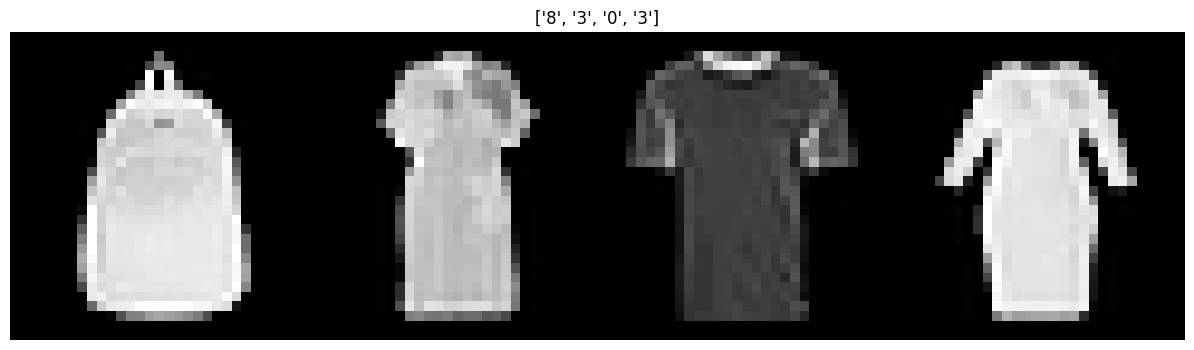

In [12]:
images, labels = show_batch_images(trainloader)

가장 상위에 표시된 숫자는 클래스(레이블)를 의미하며, 그 내용은 다음과 같습니다.
```py
classes = {
    0: "T-Shirt/Top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
    }
```

또한, 네 개의 이미지가 출력되는 이유는 `한 번의 배치에서 4개의 이미지`만 가져오도록 했기 때문입니다.

이제 모델의 네트워크를 구축해야 합니다. 배치 정규화가 적용된 모델과 비교를 위해 배치 정규화가 적용되지 않는 모델을 먼저 생성해 보겠습니다.

In [29]:
class NormalNet(nn.Module):
    def __init__(self):
        super(NormalNet, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(28*28, 48),
            nn.ReLU(),
            nn.Linear(48,24),
            nn.ReLU(),
            nn.Linear(24,10)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

이번에는 `배치 정규화`가 포함된 네트워크를 구축합니다.

In [30]:
class BNNet(nn.Module):
    def __init__(self):
        super(BNNet, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(28*28, 48),
            nn.BatchNorm1d(48),
            nn.ReLU(),
            nn.Linear(48,24),
            nn.BatchNorm1d(24),
            nn.ReLU(),
            nn.Linear(24,10)
        )
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

배치 정규화를 사용하는 이유는 은닉층에서 학습이 진행될 때마다 입력 분포가 변하면서 가중치가 엉뚱한 방향으로 갱신되는 문제가 종종 발생하기 때문입니다. 즉, 신경망의 층이 깊어질수록 학습할 때 가정했던 입력 분포가 변화하여 엉뚱한 학습이 진행될 수 있는데 배치 정규화를 적용해서 입력 분포를 고르게 맞추어 줄 수 있습니다.

![](../Static/472.jpg)

참고로 배치 정규화는 다음과 같은 위치에 놓여야 합니다.

![](../Static/473.jpg)



In [31]:
model = NormalNet()
print(model)

NormalNet(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): ReLU()
    (2): Linear(in_features=48, out_features=24, bias=True)
    (3): ReLU()
    (4): Linear(in_features=24, out_features=10, bias=True)
  )
)


In [32]:
model_bn = BNNet()
print(model_bn)

BNNet(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=48, out_features=24, bias=True)
    (4): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=24, out_features=10, bias=True)
  )
)


데이터로더를 이용하여 앞에서 내려받았던 데이터셋을 메모리로 불러올 준비를 합니다. 참고로 앞에서도 메로리로 불러오는 부분을 진행했습니다. 그때는 이미지 출력을 위한 용도로 배치 크기를 4로 설정했지만, 이번에 메로리로 불러오는 것은 학습을 위한 용도로 배치 크기를 512로 지정합니다.

In [33]:
batch_size = 512
trainloader = torchdata.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [34]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)
optimizer_bn = optim.SGD(model_bn.parameters(), lr=1e-2)

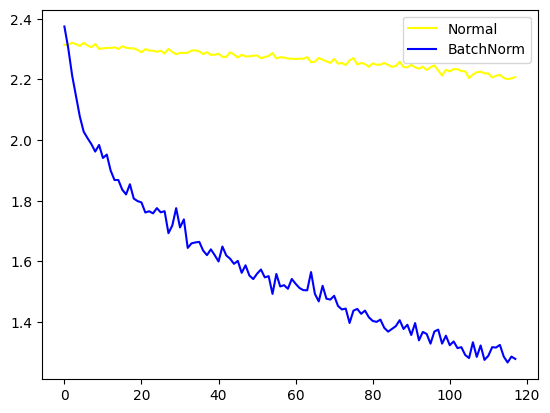

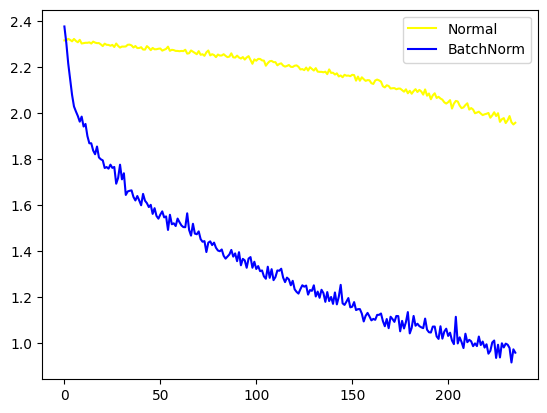

In [35]:
loss_arr = []
loss_bn_arr = []
max_epochs = 2

for epoch in range(max_epochs):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()  # 배치 정규화가 적용되지 않은 모델의 학습
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        optimizer_bn.zero_grad()  # 배치 정규화가 적용된 모델의 학습
        outputs_bn = model_bn(inputs)
        loss_bn = criterion(outputs_bn, labels)
        loss_bn.backward()
        optimizer_bn.step()

        loss_arr.append(loss.item())
        loss_bn_arr.append(loss_bn.item())

    plt.plot(loss_arr, 'yellow', label='Normal')
    plt.plot(loss_bn_arr, 'blue', label='BatchNorm')
    plt.legend()
    plt.show()

